In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

I'll start by creating a dataframe of the Open, Close, Adj Close, etc., for each of the ETFs/stocks listed for the last 20 years.
I will look at two ETFs: SPY and QQQ, as well as two stocks: AMZN and GOLD. I wanted to look at one stock that has performed well over the 20 years, and another that has been volitile and hasn't performed as well.

In [2]:
stocks = ['spy','qqq','amzn','gold']

end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

df = data.DataReader(stocks,'yahoo',start,end)
df.stack().head(10)

Attributes          Adj Close       Close        High         Low        Open  \
Date       Symbols                                                              
2001-06-12 spy      85.791550  125.879997  126.739998  124.040001  124.860001   
           qqq      39.812355   45.799999   46.799999   44.230000   44.869999   
           amzn     14.640000   14.640000   14.790000   14.320000   14.600000   
           gold     13.503128   17.139999   17.160000   16.650000   16.680000   
2001-06-13 spy      85.055496  124.800003  126.580002  124.650002  126.169998   
           qqq      38.725765   44.549999   46.750000   44.520000   46.270000   
           amzn     14.120000   14.120000   15.150000   14.110000   14.960000   
           gold     13.511009   17.150000   17.340000   16.750000   17.200001   
2001-06-14 spy      83.147202  122.000000  124.300003  121.750000  124.180000   
           qqq      36.726463   42.250000   44.400002   42.000000   44.020000   

Attributes              Volume  
Date       Symbols              
2001-06-12 spy       9364400.0  
           qqq      78450500.0  
           amzn      4333700.0  
           gold      1930600.0  
2001-06-13 spy       7629400.0  
           qqq      68535400.0  
           amzn      3784400.0  
           gold      1913300.0  
2001-06-14 spy      12603000.0  
           qqq      91050300.0

I'll look only at the 'Adjusted Close' column, which accounts for dividends, stock splits, etc. Some of the strategies involve buying and selling the stock/etf within short periods, and therefore wouldn't be able to take advantage of some of the dividend payouts. Therefore, the true payout from the stock/etf would differ slightly. However, the strategies that involve buying and selling in short periods involve the purchase/sale of one share at a time for simplicity, and therefore the dividend payouts would be insignificant.

In [3]:
df_close = DataFrame(df['Adj Close'])
df_close

Symbols,spy,qqq,amzn,gold
Date,,,,
2001-06-12,85.791550,39.812355,14.640000,13.503128
2001-06-13,85.055496,38.725765,14.120000,13.511009
2001-06-14,83.147202,36.726463,13.290000,13.613418
2001-06-15,83.281120,37.030689,12.490000,13.235269
2001-06-18,82.877899,36.535217,11.830000,13.203757
...,...,...,...,...
2021-06-07,422.190002,336.600006,3198.010010,23.410000
2021-06-08,422.279999,336.760010,3264.110107,23.120001
2021-06-09,421.649994,336.839996,3281.149902,23.010000


I'll plot the adjusted close price of the ETFs to see how they perform over time in relation to one another.

<AxesSubplot:title={'center':'Stock/ETF Performance'}, xlabel='Date(2001-2021)', ylabel='Price (USD)'>

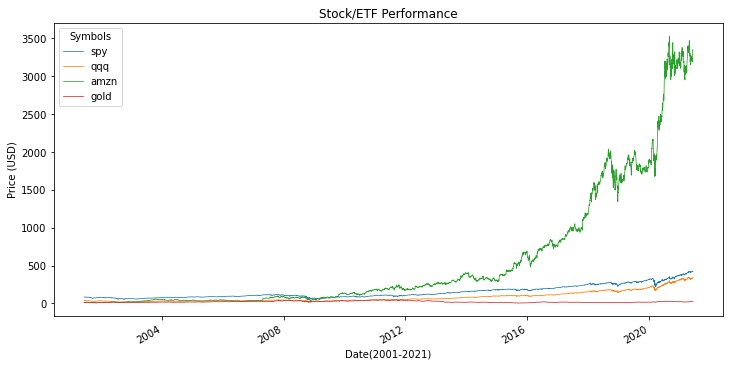

In [6]:
df_close.plot(figsize=(12,6), linewidth=.75, legend=True, xlabel = 'Date(2001-2021)',ylabel='Price (USD)', title='Stock/ETF Performance')

This plot shows how much AMZN has outperformed the other stocks/etfs. We can also see some correlation between SPY and QQQ. To get a better idea of the stocks/ETFs performance in relation to one another we will look at another plot.

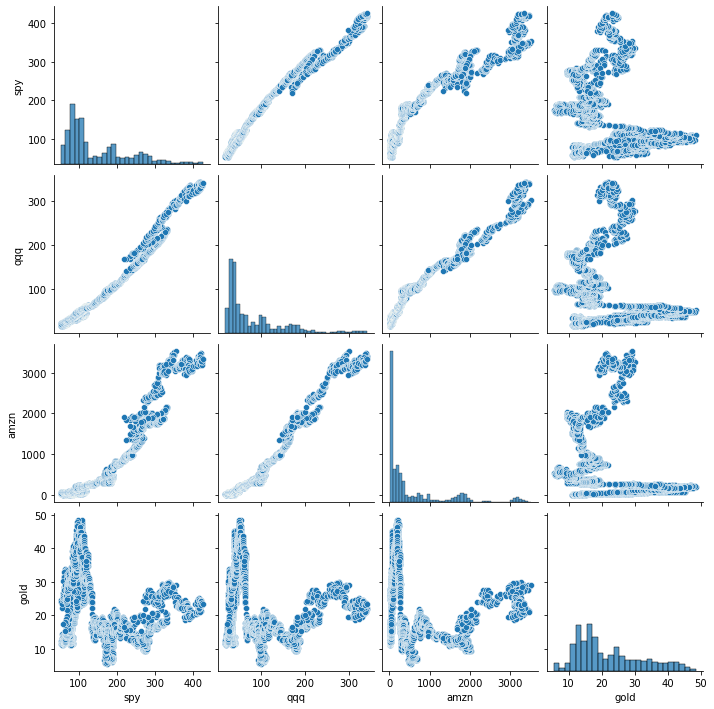

In [7]:
sns.pairplot(df_close)

We can see the distribution of the stocks and ETFs from this chart. AMZN's price has spent most of the last 20 years in the low to mid hundreds, and has only recently grown significantly in value. We can see similar distributions from SPY and QQQ but to lesser effect. We can confirm the strong positive correlation between SPY and QQQ. We can also see a strong psitive correlation between AMZN and both SPY and QQQ. It is noted that AMZN is one of the stocks tracked in SPY and QQQ.

I'll start by looking at the Dollar Cost Average strategy, which looks to invest in a stock or fund every nth specificed period of time. For this strategy I will invest every month. I'll filter the dataset to imitate investing once a month - in this case on the last day of each month.

In [13]:
df_dca = df_close.groupby(pd.Grouper(freq='M')).nth(0)
df_dca

Symbols,spy,qqq,amzn,gold
Date,,,,
2001-06-30,85.791550,39.812355,14.640000,13.503128
2001-07-31,84.839485,39.508102,14.530000,11.265737
2001-08-31,83.458862,37.465321,12.500000,11.628128
2001-09-30,77.519508,30.832836,8.590000,12.266259
2001-10-31,71.533119,24.973982,6.010000,13.944303
...,...,...,...,...
2021-02-28,375.001801,322.013306,3342.879883,22.225769
2021-03-31,388.308197,323.181824,3146.139893,18.792494
2021-04-30,400.609985,324.570007,3161.000000,20.179394


In [15]:
#Total cost of investing once a month for each of the stocks/ETFs
dca_sum = DataFrame(df_DCA.sum())
dca_sum

,0
Symbols,
spy,36036.741936
qqq,20326.492971
amzn,136054.489211
gold,5327.606197


In [19]:
#current price of the stocks/ETFs

df2 = data.DataReader(stocks,'yahoo','2021-06-12').stack()
df2

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2021-06-11 spy       424.309998   424.309998   424.429993   422.820007   
           qqq       341.239990   341.239990   341.250000   339.690002   
           amzn     3346.830078  3346.830078  3366.580078  3333.449951   
           gold       23.230000    23.230000    23.660000    23.219999   

Attributes                 Open    Volume  
Date       Symbols                         
2021-06-11 spy       424.200012  45406077  
           qqq       340.359985  21222830  
           amzn     3349.649902   2817352  
           gold       23.610001  10934697

In [21]:
value = np.array(df2['Adj Close']*241)
value_df = DataFrame(value)
value_df.columns = ['Final_Value']

cur = np.array(df2['Adj Close'])
df_cur = DataFrame(cur)
df_cur.columns = ['Current_Price']

dca1 = np.array(dca_sum)
df_cost = DataFrame(dca1)
df_cost.columns = ['Total Cost']

In [24]:
df_cur['Symbols'] = ['spy','qqq','amzn','gold']
df_cur = df_cur[df_cur.columns[::-1]]
df_cur

,Symbols,Current_Price
0,spy,424.309998
1,qqq,341.239990
2,amzn,3346.830078
3,gold,23.230000


In [25]:
df3 = df_cur.join(df_cost)
df4 = df3.join(value_df)
df4

,Symbols,Current_Price,Total Cost,Final_Value
0,spy,424.309998,36036.741936,102258.709412
1,qqq,341.239990,20326.492971,82238.837646
2,amzn,3346.830078,136054.489211,806586.048828
3,gold,23.230000,5327.606197,5598.429890


In [26]:
df4['Pct_change'] = ((df4['Final_Value'] - df4['Total Cost'])/df4['Total Cost'])*100
df4

,Symbols,Current_Price,Total Cost,Final_Value,Pct_change
0,spy,424.309998,36036.741936,102258.709412,183.762360
1,qqq,341.239990,20326.492971,82238.837646,304.589408
2,amzn,3346.830078,136054.489211,806586.048828,492.840452
3,gold,23.230000,5327.606197,5598.429890,5.083403


I've created a table to show the current price, total cost of purchasing the stocks/ETFs, the final value of the stocks/ETFs if I was to sell them at this moment in time, and the percent change column shows the percent increase on total investment.

Amazon was the best performer, but I was surprised to not see it do even better. All of the investments did quite well, except for GOLD. However, GOLD performed much better than excepted considering it's really poor performance over the last 10 years.

Next I'll look at how implementing a SMA price crossover strategy as well a 20 and 50-day SMA crossover strategy would perform on the same stocks/ETFs during the same 20 year period. I'll look at how each stock/etf performed under each strategy and compare the results of the strategies for each individual stock/ETF, and then compare the overall results at the end.

In [27]:
#I'll start by looking at a 20 day and 50 day SMA strategy for SPY
#I'll use the rolling mean function to calculate the moving averages.

SPY_df = data.DataReader('SPY','yahoo',start,end)
SPY_df['sma_20'] = SPY_df['Adj Close'].rolling(window=20,min_periods=1).mean()
SPY_df['sma_50'] = SPY_df['Adj Close'].rolling(window=50,min_periods=1).mean()
SPY_df.head(10)

,High,Low,Open,Close,Volume,Adj Close,sma_20,sma_50
Date,,,,,,,,
2001-06-12,126.739998,124.040001,124.860001,125.879997,9364400.0,85.791550,85.791550,85.791550
2001-06-13,126.580002,124.650002,126.169998,124.800003,7629400.0,85.055496,85.423523,85.423523
2001-06-14,124.300003,121.750000,124.180000,122.000000,12603000.0,83.147202,84.664749,84.664749
2001-06-15,122.400002,120.400002,120.910004,121.849998,16821100.0,83.281120,84.318842,84.318842
2001-06-18,122.440002,120.910004,121.650002,121.260002,11368300.0,82.877899,84.030653,84.030653
2001-06-19,122.889999,120.889999,122.379997,121.790001,7732300.0,83.240135,83.898900,83.898900
2001-06-20,122.860001,121.099998,121.190002,122.430000,8787200.0,83.677567,83.867281,83.867281
2001-06-21,124.309998,122.150002,122.220001,123.820000,12259100.0,84.627594,83.962320,83.962320
2001-06-22,123.589996,122.160004,123.489998,122.849998,12212000.0,83.964577,83.962571,83.962571


I'll create a column on our table that will fill a 1 when the 20 day moving average crosses over the 50 day moving average, and a 0 when it hasen't. The 'buy_sell' column will give the difference between the current row and the row before it in the 'Position' column, this 'buy_sell' column will indicate when to buy and when to sell.

In [28]:
SPY_df['Position'] = 0.0
SPY_df['Position'] = np.where(SPY_df['sma_20'] > SPY_df['sma_50'], 1.0, 0.0)

SPY_df['buy_sell'] = SPY_df['Position'].diff()
SPY_df

,High,Low,Open,Close,Volume,Adj Close,sma_20,sma_50,Position,buy_sell
Date,,,,,,,,,,
2001-06-12,126.739998,124.040001,124.860001,125.879997,9364400.0,85.791550,85.791550,85.791550,0.0,NaN
2001-06-13,126.580002,124.650002,126.169998,124.800003,7629400.0,85.055496,85.423523,85.423523,0.0,0.0
2001-06-14,124.300003,121.750000,124.180000,122.000000,12603000.0,83.147202,84.664749,84.664749,0.0,0.0
2001-06-15,122.400002,120.400002,120.910004,121.849998,16821100.0,83.281120,84.318842,84.318842,0.0,0.0
2001-06-18,122.440002,120.910004,121.650002,121.260002,11368300.0,82.877899,84.030653,84.030653,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-07,422.779999,421.190002,422.589996,422.190002,51555000.0,422.190002,416.616499,413.540598,1.0,0.0
2021-06-08,423.209991,420.320007,423.109985,422.279999,47134300.0,422.279999,416.833499,414.066598,1.0,0.0
2021-06-09,423.260010,421.410004,423.179993,421.649994,48436300.0,421.649994,417.205499,414.583998,1.0,0.0


In [29]:
#I'll look at a graph to show how this strategy is executed; specifically the last two years for a clearer picture.

df_twoyear = SPY_df.iloc[4520:,:]

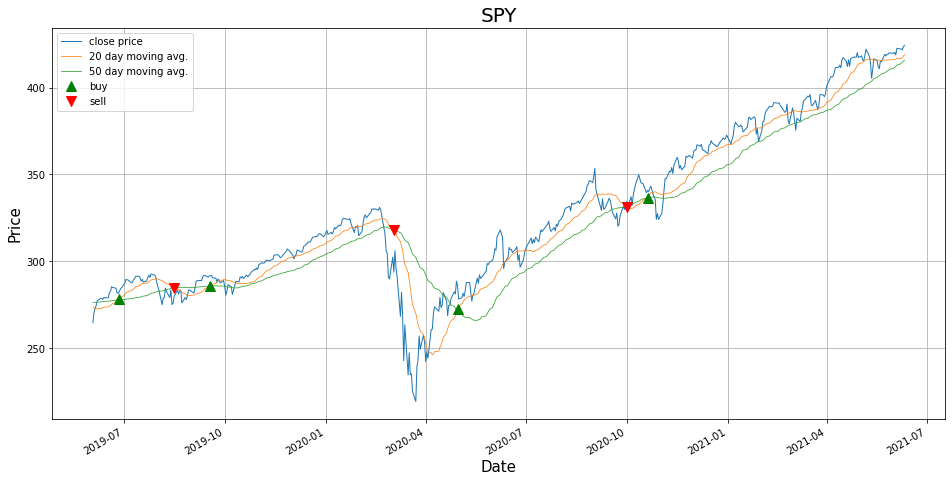

In [30]:
plt.figure(figsize = (16,8))

df_twoyear['Adj Close'].plot(label='close price',linewidth=1)

df_twoyear['sma_20'].plot(label ='20 day moving avg.',linewidth=.75) 
df_twoyear['sma_50'].plot(label ='50 day moving avg.',linewidth=.75)

plt.plot(df_twoyear[df_twoyear['buy_sell'] == 1].index, 
         df_twoyear['sma_20'][df_twoyear['buy_sell'] == 1], 
         '^', markersize = 10, color='g', label = 'buy')

plt.plot(df_twoyear[df_twoyear['buy_sell'] == -1].index, 
         df_twoyear['sma_20'][df_twoyear['buy_sell'] == -1], 
         'v', markersize = 10,color='r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SPY', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [34]:
SPY_buy = SPY_df.loc[SPY_df.buy_sell == 1]
s_c3 = SPY_buy['Adj Close'].sum()
s_c3

7154.537303924561

In [35]:
SPY_sell = SPY_df.loc[SPY_df.buy_sell == -1]
s_v3 = SPY_sell['Adj Close'].sum()
s_v3

6984.5727462768555

In [36]:
s_p3 = ((v3 - c3) / c3)*100
s_p3

-2.3756191410795

This model assumes buying one share when indicated and selling that share when indicated. I've summed all the buy positions and all the sell positions for a net loss of $191.60. This is a loss of 2.38% over 20 years, surprising to say the least.

Next I'll continue looking at SPY, but test a strategy that combines components of the last two strategies. I will look at a price crossover strategy that will trigger a buy when the price moves above the moving average, but will hold rather than sell when the price moves below the moving average. I'm hoping that this strategy will time the market better than the Dollar Cost Average strategy, while still holding onto the stock to take advantage of compound interest.

In [37]:
SPY_df2 = data.DataReader('SPY','yahoo',start,end)
SPY_df2['sma_30'] = SPY_df2['Adj Close'].rolling(window=30,min_periods=1).mean()

SPY_df2['buy_sell'] = 0.0
SPY_df2['buy_sell'] = np.where(SPY_df2['sma_30'] > SPY_df2['Adj Close'], 1.0, 0.0)

SPY_df2['Position'] = SPY_df2['buy_sell'].diff()

SPY_buy2 = SPY_df2.loc[SPY_df2.Position == 1]
s_c2 = SPY_buy2['Adj Close'].sum()
s_c2

34143.647720336914

In [38]:
SPY_df2.loc[SPY_df2.Position == 1]

,High,Low,Open,Close,Volume,Adj Close,sma_30,buy_sell,Position
Date,,,,,,,,,
2001-06-13,126.580002,124.650002,126.169998,124.800003,7629400.0,85.055496,85.423523,1.0,1.0
2001-06-25,123.440002,121.500000,123.279999,121.720001,8406800.0,83.192276,83.885542,1.0,1.0
2001-07-05,123.650002,121.660004,123.070000,121.680000,5517900.0,83.164963,83.827243,1.0,1.0
2001-07-16,122.279999,120.290001,121.769997,120.709999,6915300.0,82.502007,83.285791,1.0,1.0
2001-07-20,121.940002,120.919998,121.150002,121.339996,6705800.0,82.932602,83.257303,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2021-03-03,386.829987,381.309998,385.790009,381.420013,119940200.0,380.174835,384.108288,1.0,1.0
2021-03-24,392.750000,387.470001,391.000000,387.519989,97588600.0,387.519989,387.964202,1.0,1.0
2021-05-12,412.589996,404.000000,411.230011,405.410004,134811000.0,405.410004,413.192330,1.0,1.0


In [39]:
s_v2 = df2.iloc[0,0]*227
s_v2

96318.36944580078

In [41]:
s_p2 = ((s_v2 - s_c2) / s_c2)*100
s_p2

182.09747896511615

In [42]:
spy_dca1 = np.array(df4.iloc[0,2:])

SPY_strat_df = DataFrame(spy_dca1)
SPY_strat_df.columns = ['SPY DCA']
SPY_strat_df

,SPY DCA
0,36036.741936
1,102258.709412
2,183.76236


In [142]:
t2 = [s_c2,s_v2,s_p2]
t3 = [s_c3,s_v3,s_p3]

spy_cross1 = DataFrame(t2)
spy_cross1.columns = ['SPY_SMA1']

spy_cross2 = DataFrame(t3)
spy_cross2.columns = ['SPY_SMA2']

SPY_to = SPY_strat_df.join(spy_cross1)
SPY_tot = SPY_to.join(spy_cross2).transpose()
SPY_tot.columns = ['Total Cost','Final Value','Pct Change']
SPY_tot

,Total Cost,Final Value,Pct Change
SPY DCA,36036.741936,102258.709412,183.76236
SPY_SMA1,34143.64772,96318.369446,182.097479
SPY_SMA2,7154.537304,6984.572746,-2.375619


From the results, using two simple moving averages to time when to get in and out of the market resulted in negative returns, even if replicated on a larger scale like the other two strategies. Even when using one simple moving average to time the best places to enter the market, there is an insignificant difference in returns.

Next I will run the same strategies on the other stocks/ETFs to see the results.

In [60]:
QQQ_df = data.DataReader('QQQ','yahoo',start,end)
QQQ_df['sma_20'] = SPY_df['Adj Close'].rolling(window=20,min_periods=1).mean()
QQQ_df['sma_50'] = SPY_df['Adj Close'].rolling(window=50,min_periods=1).mean()

In [61]:
QQQ_df['Position'] = 0.0
QQQ_df['Position'] = np.where(QQQ_df['sma_20'] > QQQ_df['sma_50'], 1.0, 0.0)

QQQ_df['buy_sell'] = QQQ_df['Position'].diff()

In [46]:
QQQ_buy = QQQ_df.loc[QQQ_df.buy_sell == 1]
q_c3 = QQQ_buy['Adj Close'].sum()
q_c3

3832.412754058838

In [47]:
QQQ_sell = QQQ_df.loc[QQQ_df.buy_sell == -1]
q_v3 = QQQ_sell['Adj Close'].sum()
q_v3

3732.319700241089

In [48]:
q_p3 = ((q_v3 - q_c3) / q_c3)*100
q_p3

-2.611750357832473

In [51]:
QQQ_df2 = data.DataReader('QQQ','yahoo',start,end)
QQQ_df2['sma_30'] = QQQ_df2['Adj Close'].rolling(window=30,min_periods=1).mean()

QQQ_df2['buy_sell'] = 0.0
QQQ_df2['buy_sell'] = np.where(QQQ_df2['sma_30'] > QQQ_df2['Adj Close'], 1.0, 0.0)

QQQ_df2['Position'] = QQQ_df2['buy_sell'].diff()

QQQ_buy2 = QQQ_df2.loc[QQQ_df2.Position == 1]
q_c2 = QQQ_buy2['Adj Close'].sum()
q_c2

17666.577825546265

In [52]:
SPY_df2.loc[SPY_df2.Position == 1]

,High,Low,Open,Close,Volume,Adj Close,sma_30,buy_sell,Position
Date,,,,,,,,,
2001-06-13,126.580002,124.650002,126.169998,124.800003,7629400.0,85.055496,85.423523,1.0,1.0
2001-06-25,123.440002,121.500000,123.279999,121.720001,8406800.0,83.192276,83.885542,1.0,1.0
2001-07-05,123.650002,121.660004,123.070000,121.680000,5517900.0,83.164963,83.827243,1.0,1.0
2001-07-16,122.279999,120.290001,121.769997,120.709999,6915300.0,82.502007,83.285791,1.0,1.0
2001-07-20,121.940002,120.919998,121.150002,121.339996,6705800.0,82.932602,83.257303,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2021-03-03,386.829987,381.309998,385.790009,381.420013,119940200.0,380.174835,384.108288,1.0,1.0
2021-03-24,392.750000,387.470001,391.000000,387.519989,97588600.0,387.519989,387.964202,1.0,1.0
2021-05-12,412.589996,404.000000,411.230011,405.410004,134811000.0,405.410004,413.192330,1.0,1.0


In [57]:
q_v2 = df2.iloc[1,0]*230
q_v2

78485.19775390625

In [58]:
q_p2 = ((q_v2 - q_c2) / q_c2)*100
q_p2

344.25807040237817

In [62]:
QQQ_dca1 = np.array(df4.iloc[1,2:])

QQQ_strat_df = DataFrame(QQQ_dca1)
QQQ_strat_df.columns = ['QQQ DCA']

In [141]:
q_t2 = [q_c2,q_v2,q_p2]
q_t3 = [q_c3,q_v3,q_p3]

qqq_cross1 = DataFrame(q_t2)
qqq_cross1.columns = ['QQQ_SMA1']

qqq_cross2 = DataFrame(q_t3)
qqq_cross2.columns = ['QQQ_SMA2']

qqq_to = QQQ_strat_df.join(qqq_cross1)
qqq_tot = qqq_to.join(qqq_cross2).transpose()
qqq_tot.columns = ['Total Cost','Final Value','Pct Change']
qqq_tot

,Total Cost,Final Value,Pct Change
QQQ DCA,20326.492971,82238.837646,304.589408
QQQ_SMA1,17666.577826,78485.197754,344.25807
QQQ_SMA2,3832.412754,3732.3197,-2.61175


Now I'll run the same strategies for AMZN

In [64]:
AMZN_df = data.DataReader('AMZN','yahoo',start,end)
AMZN_df['sma_20'] = AMZN_df['Adj Close'].rolling(window=20,min_periods=1).mean()
AMZN_df['sma_50'] = AMZN_df['Adj Close'].rolling(window=50,min_periods=1).mean()

In [65]:
AMZN_df['Position'] = 0.0
AMZN_df['Position'] = np.where(AMZN_df['sma_20'] > AMZN_df['sma_50'], 1.0, 0.0)

AMZN_df['buy_sell'] = AMZN_df['Position'].diff()

In [66]:
AMZN_buy = AMZN_df.loc[AMZN_df.buy_sell == 1]
a_c3 = AMZN_buy['Adj Close'].sum()
a_c3

29006.550058841705

In [67]:
AMZN_sell = AMZN_df.loc[AMZN_df.buy_sell == -1]
a_v3 = AMZN_sell['Adj Close'].sum()
a_v3

30423.520086288452

In [68]:
a_p3 = ((a_v3 - a_c3) / a_c3)*100
a_p3

4.885000196756696

In [69]:
AMZN_df2 = data.DataReader('AMZN','yahoo',start,end)
AMZN_df2['sma_30'] = AMZN_df2['Adj Close'].rolling(window=30,min_periods=1).mean()

AMZN_df2['buy_sell'] = 0.0
AMZN_df2['buy_sell'] = np.where(AMZN_df2['sma_30'] > AMZN_df2['Adj Close'], 1.0, 0.0)

AMZN_df2['Position'] = AMZN_df2['buy_sell'].diff()

AMZN_buy2 = AMZN_df2.loc[AMZN_df2.Position == 1]
a_c2 = AMZN_buy2['Adj Close'].sum()
a_c2

122515.3003540039

In [71]:
AMZN_df2.loc[AMZN_df2.Position == 1]

,High,Low,Open,Close,Volume,Adj Close,sma_30,buy_sell,Position
Date,,,,,,,,,
2001-06-13,15.150000,14.110000,14.960000,14.120000,3784400,14.120000,14.380000,1.0,1.0
2001-06-22,13.270000,12.380000,13.130000,12.400000,6316700,12.400000,12.860000,1.0,1.0
2001-07-24,14.000000,11.900000,13.620000,12.060000,32572900,12.060000,14.455333,1.0,1.0
2001-10-29,7.660000,7.040000,7.610000,7.050000,5161800,7.050000,7.503667,1.0,1.0
2001-12-20,10.830000,10.140000,10.570000,10.150000,7851200,10.150000,10.251667,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2021-01-06,3197.510010,3131.159912,3146.479980,3138.379883,4394800,3138.379883,3188.630664,1.0,1.0
2021-01-29,3236.989990,3184.550049,3230.000000,3206.199951,4293600,3206.199951,3213.300309,1.0,1.0
2021-02-19,3333.500000,3245.750000,3328.229980,3249.899902,4305200,3249.899902,3252.867969,1.0,1.0


In [72]:
a_v2 = df2.iloc[2,0]*208
a_v2

696140.65625

In [73]:
a_p2 = ((a_v2 - a_c2) / a_c2)*100
a_p2

468.2071171833433

In [74]:
AMZN_dca1 = np.array(df4.iloc[2,2:])

AMZN_strat_df = DataFrame(AMZN_dca1)
AMZN_strat_df.columns = ['AMZN DCA']

In [143]:
a_t2 = [a_c2,a_v2,a_p2]
a_t3 = [a_c3,a_v3,a_p3]

AMZN_cross1 = DataFrame(a_t2)
AMZN_cross1.columns = ['AMZN_SMA1']

AMZN_cross2 = DataFrame(a_t3)
AMZN_cross2.columns = ['AMZN_SMA2']

AMZN_to = AMZN_strat_df.join(AMZN_cross1)
AMZN_tot = AMZN_to.join(AMZN_cross2).transpose()
AMZN_tot.columns = ['Total Cost','Final Value','Pct Change']
AMZN_tot

,Total Cost,Final Value,Pct Change
AMZN DCA,136054.489211,806586.048828,492.840452
AMZN_SMA1,122515.300354,696140.65625,468.207117
AMZN_SMA2,29006.550059,30423.520086,4.885


Finally I'll look at GOLD

In [76]:
GOLD_df = data.DataReader('GOLD','yahoo',start,end)
GOLD_df['sma_20'] = GOLD_df['Adj Close'].rolling(window=20,min_periods=1).mean()
GOLD_df['sma_50'] = GOLD_df['Adj Close'].rolling(window=50,min_periods=1).mean()

In [77]:
GOLD_df['Position'] = 0.0
GOLD_df['Position'] = np.where(GOLD_df['sma_20'] > GOLD_df['sma_50'], 1.0, 0.0)

GOLD_df['buy_sell'] = GOLD_df['Position'].diff()

In [78]:
GOLD_buy = GOLD_df.loc[GOLD_df.buy_sell == 1]
g_c3 = GOLD_buy['Adj Close'].sum()
g_c3

1292.8013501167297

In [79]:
GOLD_sell = GOLD_df.loc[GOLD_df.buy_sell == -1]
g_v3 = GOLD_sell['Adj Close'].sum()
g_v3

1237.6428980827332

In [80]:
g_p3 = ((g_v3 - g_c3) / g_c3)*100
g_p3

-4.26658372757858

In [81]:
GOLD_df2 = data.DataReader('GOLD','yahoo',start,end)
GOLD_df2['sma_30'] = GOLD_df2['Adj Close'].rolling(window=30,min_periods=1).mean()

GOLD_df2['buy_sell'] = 0.0
GOLD_df2['buy_sell'] = np.where(GOLD_df2['sma_30'] > GOLD_df2['Adj Close'], 1.0, 0.0)

GOLD_df2['Position'] = GOLD_df2['buy_sell'].diff()

GOLD_buy2 = GOLD_df2.loc[AMZN_df2.Position == 1]
g_c2 = GOLD_buy2['Adj Close'].sum()
g_c2

4531.2975730896

In [82]:
GOLD_df2.loc[GOLD_df2.Position == 1]

,High,Low,Open,Close,Volume,Adj Close,sma_30,buy_sell,Position
Date,,,,,,,,,
2001-06-15,17.170000,16.709999,16.950001,16.799999,1892800.0,13.235269,13.465706,1.0,1.0
2001-07-26,15.550000,15.170000,15.550000,15.200000,1232600.0,11.974764,12.224242,1.0,1.0
2001-09-04,15.970000,15.570000,15.870000,15.570000,1055200.0,12.266259,12.450607,1.0,1.0
2001-09-06,15.940000,15.620000,15.810000,15.730000,1848800.0,12.392308,12.457697,1.0,1.0
2001-09-25,16.680000,16.320000,16.549999,16.320000,1882400.0,12.857118,12.873926,1.0,1.0
...,...,...,...,...,...,...,...,...,...
2021-03-23,20.559999,20.020000,20.559999,20.240000,17602100.0,20.050610,20.238609,1.0,1.0
2021-03-30,19.750000,19.440001,19.690001,19.510000,14899400.0,19.327440,19.878462,1.0,1.0
2021-06-03,23.600000,23.129999,23.570000,23.209999,21158500.0,23.209999,23.272824,1.0,1.0


In [83]:
g_v2 = df2.iloc[3,0]*242
g_v2

5621.659889221191

In [84]:
g_p2 = ((g_v2 - g_c2) / g_c2)*100
g_p2

24.062915722132637

In [85]:
GOLD_dca1 = np.array(df4.iloc[3,2:])

GOLD_strat_df = DataFrame(GOLD_dca1)
GOLD_strat_df.columns = ['GOLD DCA']

In [144]:
g_t2 = [g_c2,g_v2,g_p2]
g_t3 = [g_c3,g_v3,g_p3]

GOLD_cross1 = DataFrame(g_t2)
GOLD_cross1.columns = ['GOLD_SMA1']

GOLD_cross2 = DataFrame(g_t3)
GOLD_cross2.columns = ['GOLD_SMA2']

GOLD_to = GOLD_strat_df.join(GOLD_cross1)
GOLD_tot = GOLD_to.join(GOLD_cross2).transpose()
GOLD_tot.columns = ['Total Cost','Final Value','Pct Change']
GOLD_tot

,Total Cost,Final Value,Pct Change
GOLD DCA,5327.606197,5598.42989,5.083403
GOLD_SMA1,4531.297573,5621.659889,24.062916
GOLD_SMA2,1292.80135,1237.642898,-4.266584


In [145]:
result = pd.concat([SPY_tot, qqq_tot, AMZN_tot, GOLD_tot]).astype('int32')
result

,Total Cost,Final Value,Pct Change
SPY DCA,36036,102258,183
SPY_SMA1,34143,96318,182
SPY_SMA2,7154,6984,-2
QQQ DCA,20326,82238,304
QQQ_SMA1,17666,78485,344
QQQ_SMA2,3832,3732,-2
AMZN DCA,136054,806586,492
AMZN_SMA1,122515,696140,468
AMZN_SMA2,29006,30423,4
GOLD DCA,5327,5598,5


In [180]:
result['Category'] = ['DCA','1 SMA','2 SMA','DCA','1 SMA','2 SMA','DCA','1 SMA','2 SMA','DCA','1 SMA','2 SMA']
result

,Total Cost,Final Value,Pct Change,Category
SPY DCA,36036,102258,183,DCA
SPY_SMA1,34143,96318,182,1 SMA
SPY_SMA2,7154,6984,-2,2 SMA
QQQ DCA,20326,82238,304,DCA
QQQ_SMA1,17666,78485,344,1 SMA
QQQ_SMA2,3832,3732,-2,2 SMA
AMZN DCA,136054,806586,492,DCA
AMZN_SMA1,122515,696140,468,1 SMA
AMZN_SMA2,29006,30423,4,2 SMA
GOLD DCA,5327,5598,5,DCA


We can see using the 20 day and 50 day moving average was unsuccessful across the board. Trying the time the market was pretty insignificant for all the stocks/ETFs except for GOLD. We can see a large increase from 5% when randomly entering the market to 24% when trying to time the market. AMZN actually had better returns when randomly entering the market versus trying to time the market.

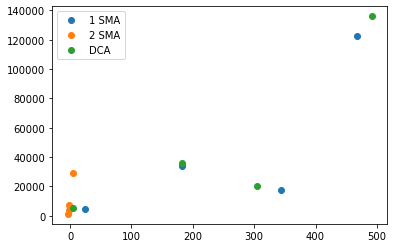

In [185]:
strategies = result.groupby('Category')
for types, strategy in strategies:
    plt.plot(strategy['Pct Change'], strategy['Total Cost'], marker='o', linestyle='', label=types)
plt.legend()

With this plot we can see how much the strategy would have cost, i.e. how draining it would be on the total capital in our portfolio, we plot this against the total return percentage. We can see while dollar cost averaging AMZN was very successful, it would have also required a lot of capital. We can see from the orange dots, that the 2 SMA strategy, while not tying up much capital, was also extremely ineffective across all stocks/ETFs tested. We can see from the data, trying to time when to get in and out of the market can be quite difficult. Now that I've laid out the basis for these strategies, I can back-test any number of ETFs or stocks, and can adjust the length of the simple moving averages for different result. while these tests don't give any indication of future returns, it merely shows the results if these strategies had been executed based on historical data.